In [2]:
from astropy.table import Table, join, hstack
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u

path = '/Users/marchuertascompany/Documents/data/EUCLID/validation'

# Load the FITS tables
table1 = Table.read(path + "/CosmosDeep/single_sersic/EUC_MER_FINAL-MORPH-CAT_TILE101545697-9C3611_20231222T025655.428526Z_00.00.fits")
table2 = Table.read(path + "/CosmosDeep/single_sersic/EUC_MER_FINAL-CAT_TILE101545697-B2CED4_20231222T025656.220453Z_00.00.fits")
ascii_table = Table.read(
    path + "/COSMOS_ACS814_Griggith12.tsv",
    format='ascii',
    data_start=76,  # Specify the line where the data starts
    delimiter=';',
    names=[
        'ObjNo', 'RAJ2000', 'DEJ2000', 'f1', 'f2', 'Imaging', 'z', 'umag', 'gmag', 'rmag',
        'imag', 'Class', 'mu1', 'mu2', 'Sf1', 'Gf1', 's/g1', 's/g2', 'mGal1', 'e_mGal1',
        'mGal2', 'e_mGal2', 'Re.G1', 'e_Re.G1', 'Re.G2', 'e_Re.G2', 'n.G1', 'e_n.G1', 'n.G2',
        'e_n.G2', 'b/a.G1', 'e_b/a.G1', 'b/a.G2', 'e_b/a.G2', 'pa.G1', 'e_pa.G1', 'pa.G2',
        'e_pa.G2'
    ]
)

# Perform an inner join based on the OBJECT_ID column
result_table = join(table1, table2, keys='OBJECT_ID', join_type='inner')

# Create SkyCoord objects for the matching columns
coord_table1 = SkyCoord(ra=result_table['RIGHT_ASCENSION'], dec=result_table['DECLINATION'], unit=(u.deg, u.deg))
coord_ascii_table = SkyCoord(ra=ascii_table['RAJ2000'], dec=ascii_table['DEJ2000'], unit=(u.deg, u.deg))

# Find the nearest on-sky matches
idx, sep, _ = match_coordinates_sky(coord_table1, coord_ascii_table)

# Select the best matching rows from the ASCII table using positional indexing
matched_ascii_rows = ascii_table[idx]

# Combine the matched rows with the result_table using hstack
result_table = hstack([result_table, matched_ascii_rows], join_type='inner')

# Save the resulting table to a new FITS file
#result_table.write("matched_tables_with_ascii.fits", format="fits")


In [3]:
res_table_pandas = result_table.to_pandas()

In [4]:
res_table_pandas.columns

Index(['OBJECT_ID', 'CONCENTRATION', 'CONCENTRATION_ERR', 'ASYMMETRY',
       'ASYMMETRY_ERR', 'SMOOTHNESS', 'SMOOTHNESS_ERR', 'GINI', 'GINI_ERR',
       'MOMENT_20',
       ...
       'n.G2', 'e_n.G2', 'b/a.G1', 'e_b/a.G1', 'b/a.G2', 'e_b/a.G2', 'pa.G1',
       'e_pa.G1', 'pa.G2', 'e_pa.G2'],
      dtype='object', length=468)

In [ ]:
plt.scatter(res_table_pandas.mGal1,)

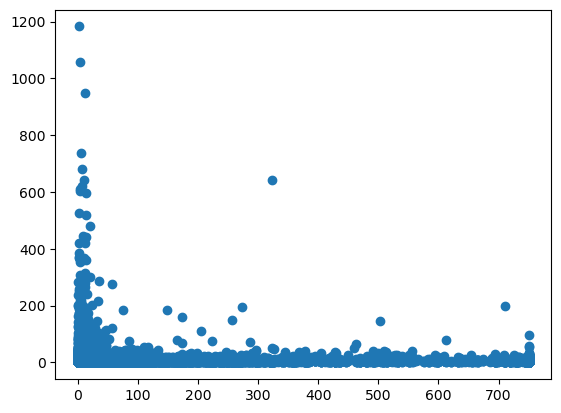

In [6]:
import matplotlib.pyplot as plt
plt.scatter(res_table_pandas['Re.G1'],res_table_pandas.SERSIC_SERSIC_RADIUS)